In [28]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

from lib import *

In [2]:
dfepitope = pd.read_csv('/home/amayer/data/peptidome/allhuman-iedb-epitopes.csv', header=1, usecols=(2, 9, 14))
dfepitope = dfepitope.fillna('')

In [17]:
k = 3
dfhuman = counter_to_df(count_kmers_proteome(human, k))
dfmouse = counter_to_df(count_kmers_proteome(mouse, k))
epi = list(dfepitope['Description'])
dfiedb = counter_to_df(count_kmers_iterable(epi, k))

In [18]:
len(epi), 20**k

(53132, 8000)

(2e-07, 0.0005)

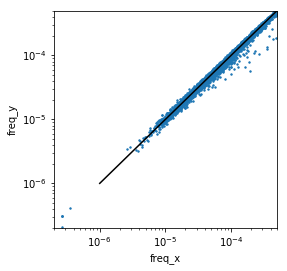

In [19]:
dfm = dfhuman.merge(dfmouse, on='seq')
fig, ax = plt.subplots(figsize=(4, 4))
dfm.plot('freq_x', 'freq_y', kind='scatter', logx=True, logy=True, ax=ax, s=2)
plt.plot(np.logspace(-6, -2), np.logspace(-6, -2), 'k')
ax.set_xlim(2e-7, 5e-4)
ax.set_ylim(2e-7, 5e-4)

(2e-07, 0.0005)

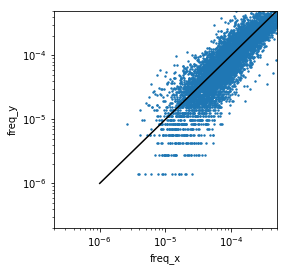

In [20]:
dfm = dfhuman.merge(dfiedb, on='seq')
fig, ax = plt.subplots(figsize=(4, 4))
dfm.plot('freq_x', 'freq_y', kind='scatter', logx=True, logy=True, ax=ax, s=2)
plt.plot(np.logspace(-6, -2), np.logspace(-6, -2), 'k')
ax.set_xlim(2e-7, 5e-4)
ax.set_ylim(2e-7, 5e-4)

In [21]:
dfm['fold'] = dfm['freq_y']/dfm['freq_x']

(SpearmanrResult(correlation=-0.024553064443590702, pvalue=0.02824383226336944),
 array([[ 1.        , -0.01426077],
        [-0.01426077,  1.        ]]))

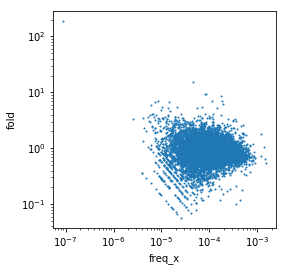

In [30]:
fig, ax = plt.subplots(figsize=(4, 4))
dfm.plot('freq_x', 'fold', kind='scatter', logx=True, logy=True, ax=ax, s=1)
#plt.plot(np.logspace(-6, -2), np.logspace(-6, -2), 'k')
#ax.set_xlim(2e-7, 5e-4)
#ax.set_ylim(2e-7, 5e-4)
scipy.stats.spearmanr(dfm['freq_x'], dfm['fold']), np.corrcoef(np.log(dfm['freq_x']), np.log(dfm['fold']))

In [31]:
dfm.sort_values('fold')

,seq,freq_x,freq_y,fold
6198,HCN,2.497784e-05,0.000001,0.056393
6939,WMK,2.082957e-05,0.000001,0.067624
7725,HMK,4.060002e-05,0.000003,0.069388
7653,FKW,1.977044e-05,0.000001,0.071246
7632,KCH,3.548088e-05,0.000003,0.079399
5111,CCV,5.278002e-05,0.000004,0.080063
7895,MCF,1.703435e-05,0.000001,0.082690
6906,WDH,1.624001e-05,0.000001,0.086735
2879,CVH,3.212697e-05,0.000003,0.087688
7775,WDC,1.588696e-05,0.000001,0.088662
